In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_excel("C:/Users/a/Downloads/05_data1.xlsx")

In [29]:
df['blood_sugar'] = df['blood_sugar'].astype(int)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)
df['BMI'] = df['weight']/(df['height']*df['height'])

In [30]:
df['BMI'] = df['BMI']*10000
df['BMI'] = df['BMI'].astype(int)
df[['BMI','blood_sugar']].head()

,BMI,blood_sugar
0,22,90
1,20,110
2,24,86
3,29,250
4,22,104


In [31]:
data = df.loc[:,['gender','BMI','blood_sugar']]
data.loc[data['gender']==1,['gender']]='M'
data.loc[data['gender']==2,['gender']]='F'
data.loc[data['blood_sugar'] < 120,'Blood_sugar']='120_under'
data.loc[data['blood_sugar'] >= 120,'Blood_sugar']='120_over'
data.loc[data['BMI'] <= 25, 'Bmi'] ='25_over'
data.loc[data['BMI'] > 25, 'Bmi'] = '25_under'

In [32]:
data.head()

,gender,BMI,blood_sugar,Blood_sugar,Bmi
0,M,22,90,120_under,25_over
1,F,20,110,120_under,25_over
2,M,24,86,120_under,25_over
3,M,29,250,120_over,25_under
4,F,22,104,120_under,25_over


In [33]:
blood_sugar = data.groupby(['gender','Blood_sugar'])['Blood_sugar'].count()
BMI = data.groupby(['gender','Bmi'])['Bmi'].count()
blood_sugar = blood_sugar.to_frame(name='count')
BMI = BMI.to_frame(name='count')
blood_sugar = blood_sugar.reset_index()
BMI = BMI.reset_index()

In [34]:
blood_sugar

,gender,Blood_sugar,count
0,F,120_over,145
1,F,120_under,1354
2,M,120_over,276
3,M,120_under,1225


In [35]:
BMI

,gender,Bmi,count
0,F,25_over,1151
1,F,25_under,348
2,M,25_over,1080
3,M,25_under,421


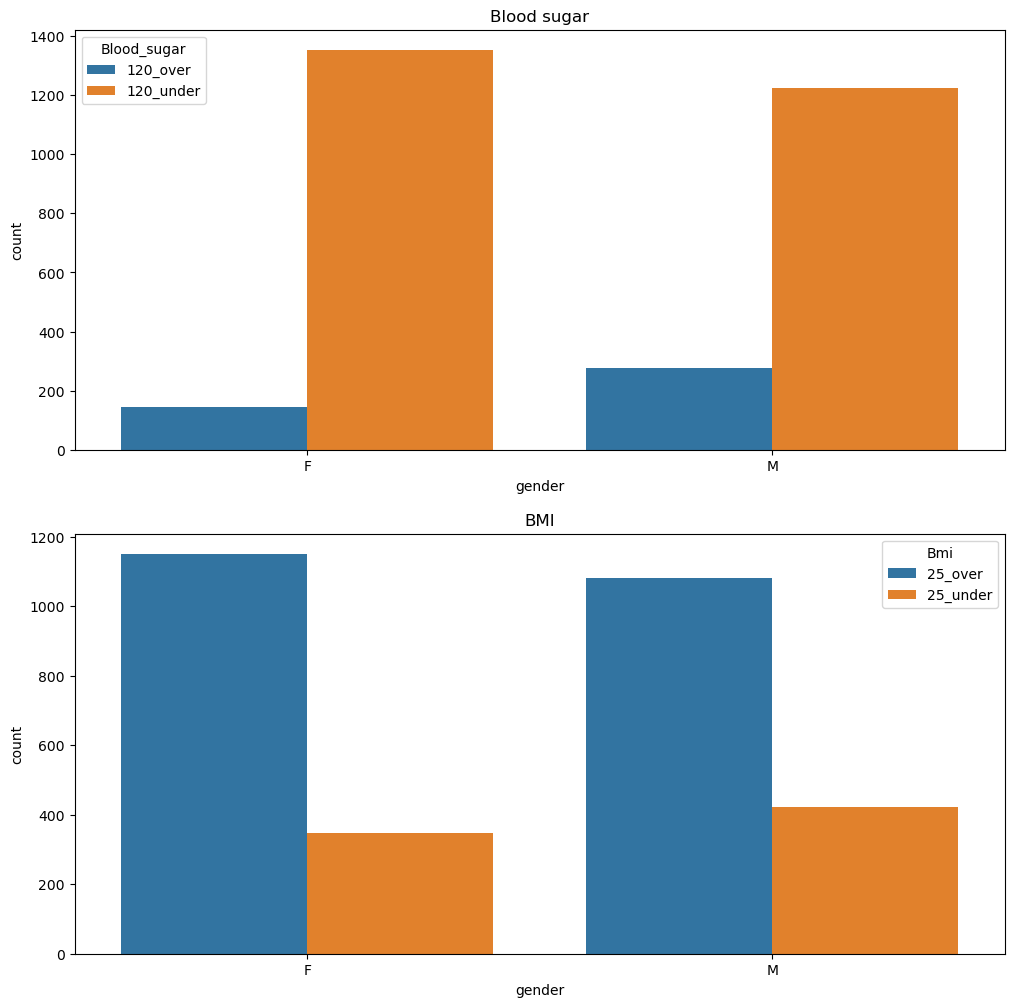

In [36]:
fig = plt.figure(figsize=(12,12))

area1 = fig.add_subplot(2,1,1)
area2 = fig.add_subplot(2,1,2)
ax1 = sns.barplot(x='gender',y='count',hue='Blood_sugar',data = blood_sugar,ax=area1)
ax2 = sns.barplot(x='gender',y='count',hue='Bmi',data = BMI,ax=area2)

area1.set_title('Blood sugar')
area2.set_title('BMI')
plt.show()